In [123]:
#Task of Data exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
df = pd.read_csv('twitter_disaster.csv')

In [125]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [126]:
#Dataset structure evaluation
print("Dataset structure:")
print(df.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


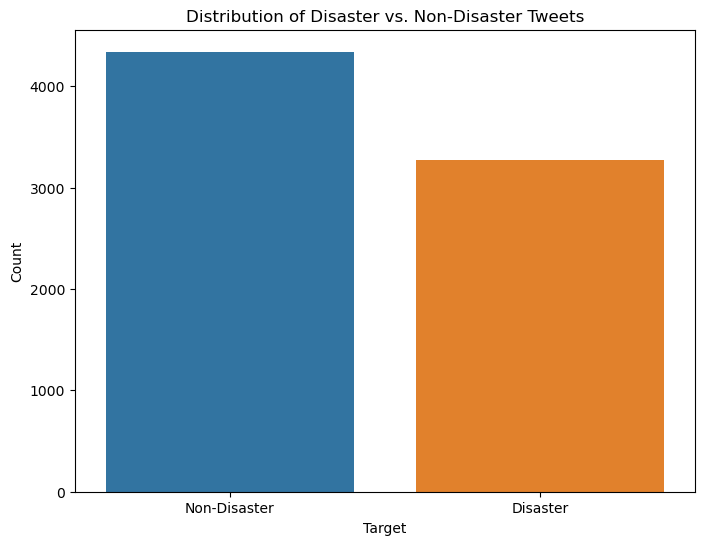

In [127]:
# Visualization of distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Disaster', 'Disaster'])
plt.show()

In [128]:
# Task of data preparation
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import re

In [74]:
#Cleaning of text dataset
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [75]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [76]:
df['cleaned_text']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13 000 people receive wildfires evacuation ord...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609     aria_ahrary thetawniest the out of control wi...
7610             m1 94 01 04 utc 5km s of volcano hawaii 
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: cleaned_text, Length: 7613, dtype: object

In [77]:
#Tokenized the text dataset
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [78]:
df['tokenized_text']

0       [our, deeds, are, the, reason, of, this, earth...
1           [forest, fire, near, la, ronge, sask, canada]
2       [all, residents, asked, to, shelter, in, place...
3       [13, 000, people, receive, wildfires, evacuati...
4       [just, got, sent, this, photo, from, ruby, ala...
                              ...                        
7608    [two, giant, cranes, holding, a, bridge, colla...
7609    [aria_ahrary, thetawniest, the, out, of, contr...
7610    [m1, 94, 01, 04, utc, 5km, s, of, volcano, haw...
7611    [police, investigating, after, an, e, bike, co...
7612    [the, latest, more, homes, razed, by, northern...
Name: tokenized_text, Length: 7613, dtype: object

In [79]:
#Converted the text labels into numerical dataset
df['target'] = df['target'].map({'non-disaster': 0, 'disaster': 1})

In [80]:
df['target']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7608   NaN
7609   NaN
7610   NaN
7611   NaN
7612   NaN
Name: target, Length: 7613, dtype: float64

In [81]:
# splitting of dataset into training and testing model
X = df['tokenized_text']
y = df['target']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
#Displayed first few rows of cleaned dataset
print(df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text  \
0     NaN  our deeds are the reason of this earthquake ma...   
1     NaN              forest fire near la ronge sask canada   
2     NaN  all residents asked to shelter in place are be...   
3     NaN  13 000 people receive wildfires evacuation ord...   
4     NaN  just got sent this photo from ruby alaska as s...   

                                      tokenized_text  
0  [our, deeds, are, the, reason, of, this, earth...  
1      [forest, fire, near, la, ronge, sas

In [84]:
# Display the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (6090,), (6090,)
Testing set shape: (1523,), (1523,)


In [85]:
# Task feature engoneering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import gensim.downloader as api

In [86]:
# Extraction of additional features
df['tweet_length'] = df['cleaned_text'].apply(len)
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_user_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)

In [87]:
df['tweet_length']

0        68
1        37
2       130
3        64
4        86
       ... 
7608     61
7609    123
7610     40
7611    136
7612     69
Name: tweet_length, Length: 7613, dtype: int64

In [88]:
df['has_hashtag']

0       1
1       0
2       0
3       1
4       1
       ..
7608    0
7609    0
7610    0
7611    0
7612    0
Name: has_hashtag, Length: 7613, dtype: int64

In [89]:
df['has_user_mention']

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    1
7610    0
7611    0
7612    0
Name: has_user_mention, Length: 7613, dtype: int64

In [90]:
#TF-IDF scores
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

In [91]:
# Sentiment analysis features
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [92]:
# Pre-trained word embeddings (GloVe)
word_vectors = api.load("glove-twitter-25")

In [93]:
def get_average_word_vector(tokens_list, vector, generate_missing=False, k=25):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

In [94]:
df['average_word_vector'] = df['tokenized_text'].apply(lambda x: get_average_word_vector(x, word_vectors))

In [95]:
df['average_word_vector']

0       [-0.040182464, 0.19568661, -0.2082236, 0.23082...
1       [-0.5672614, -0.2023077, -0.18259716, -0.00229...
2       [-0.27111563, 0.39812467, -0.0993779, -0.21196...
3       [-0.2380844453970591, 0.45788943850331837, -0....
4       [-0.27180684, 0.12952232, 0.26146662, 0.171220...
                              ...                        
7608    [-0.54198617, 0.07965871, 0.38533908, 0.137249...
7609    [-0.10207070033065975, 0.016600499395281076, -...
7610    [-0.12434759773314, -0.1289437010884285, -0.05...
7611    [-0.13769136, 0.21041356, 0.03188341, -0.14682...
7612    [-0.18451972, 0.016927456, -0.03241718, -0.288...
Name: average_word_vector, Length: 7613, dtype: object

In [96]:
# Combining the features
X_additional_features = df[['tweet_length', 'has_hashtag', 'has_user_mention', 'sentiment']]
X_combined = np.hstack((X_tfidf.toarray(), X_additional_features))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['target'], test_size=0.2, random_state=42)

In [98]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6090, 5004) (6090,)
Testing set shape: (1523, 5004) (1523,)


In [99]:
# Task model selection and training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [100]:
df

,id,keyword,location,text,target,cleaned_text,tokenized_text,tweet_length,has_hashtag,has_user_mention,sentiment,average_word_vector
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,NaN,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...",68,1,0,0.2732,"[-0.040182464, 0.19568661, -0.2082236, 0.23082..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,NaN,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",37,0,0,-0.3400,"[-0.5672614, -0.2023077, -0.18259716, -0.00229..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,NaN,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...",130,0,0,-0.2960,"[-0.27111563, 0.39812467, -0.0993779, -0.21196..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",NaN,13 000 people receive wildfires evacuation ord...,"[13, 000, people, receive, wildfires, evacuati...",64,1,0,0.0000,"[-0.2380844453970591, 0.45788943850331837, -0...."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,NaN,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...",86,1,0,0.0000,"[-0.27180684, 0.12952232, 0.26146662, 0.171220..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,NaN,two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla...",61,0,0,-0.4939,"[-0.54198617, 0.07965871, 0.38533908, 0.137249..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,NaN,aria_ahrary thetawniest the out of control wi...,"[aria_ahrary, thetawniest, the, out, of, contr...",123,0,1,-0.5849,"[-0.10207070033065975, 0.016600499395281076, -..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,NaN,m1 94 01 04 utc 5km s of volcano hawaii,"[m1, 94, 01, 04, utc, 5km, s, of, volcano, haw...",40,0,0,0.0000,"[-0.12434759773314, -0.1289437010884285, -0.05..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,NaN,police investigating after an e bike collided ...,"[police, investigating, after, an, e, bike, co...",136,0,0,-0.7845,"[-0.13769136, 0.21041356, 0.03188341, -0.14682..."


In [101]:
# Spliting of the dataset into features (X) and target (y)
X = df['text']
y = df['tweet_length']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Defined the candidate classification models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC())
]

In [104]:
# Defined the pipeline with TF-IDF vectorizer and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', None)
])

In [105]:
# Evaluation of model using cross-validation
for model_name, model in models:
    pipeline.set_params(clf=model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=2, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Logistic Regression - Cross-Validation Accuracy: 0.0859 (±0.0025)


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest - Cross-Validation Accuracy: 0.1023 (±0.0031)


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Support Vector Machine - Cross-Validation Accuracy: 0.0964 (±0.0015)


In [106]:
param_grid = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

In [107]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10, 100],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [108]:
best_model = grid_search.best_estimator_

In [109]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', SVC(C=100, kernel='linear'))])

In [110]:
y_pred = best_model.predict(X_test)

In [111]:
# Task model evaluation and validation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, f1_score, precision_score, recall_score

In [119]:
def evaluate_model(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.1485
Recall: 0.1356
F1-Score: 0.1249


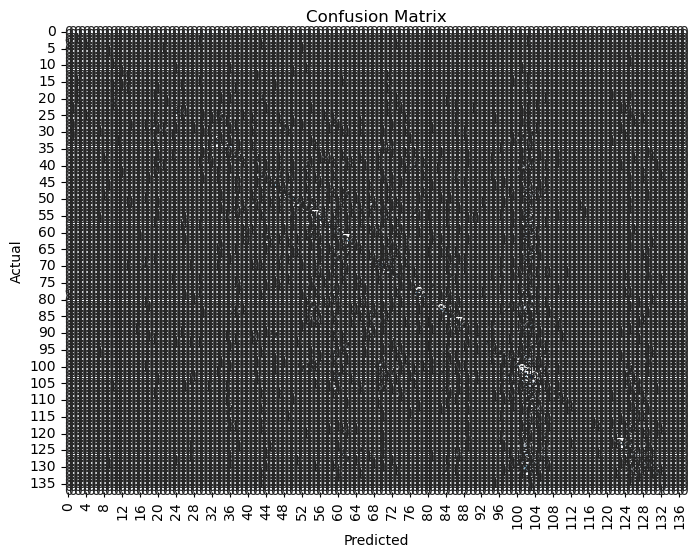

In [134]:
  # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()